Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

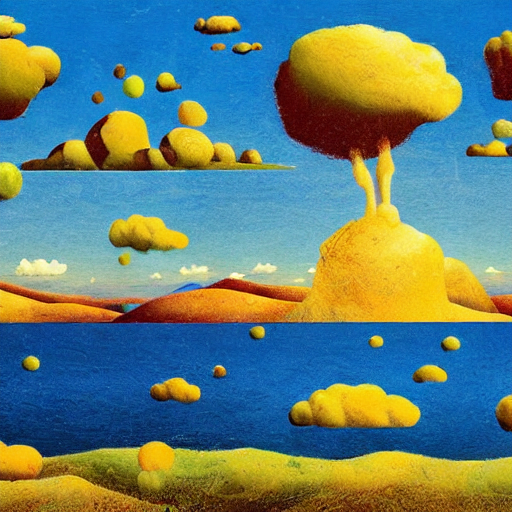

Modelo: CompVis/stable-diffusion-v1-4
Tiempo de generación: 49.05 segundos
Imagen guardada como: imagen_generada_CompVis_stable-diffusion-v1-4.png



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

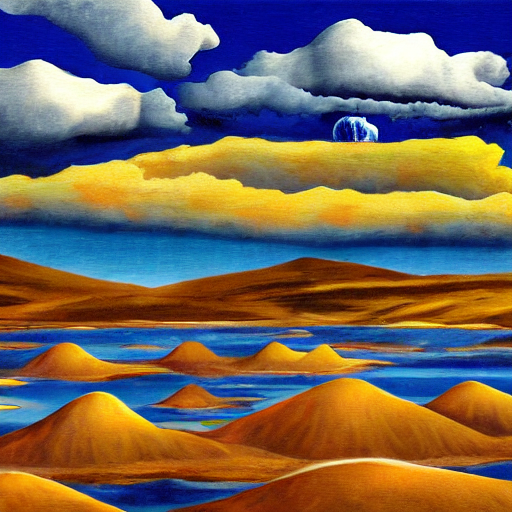

Modelo: runwayml/stable-diffusion-v1-5
Tiempo de generación: 33.95 segundos
Imagen guardada como: imagen_generada_runwayml_stable-diffusion-v1-5.png



Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/image_processor.py:147: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")


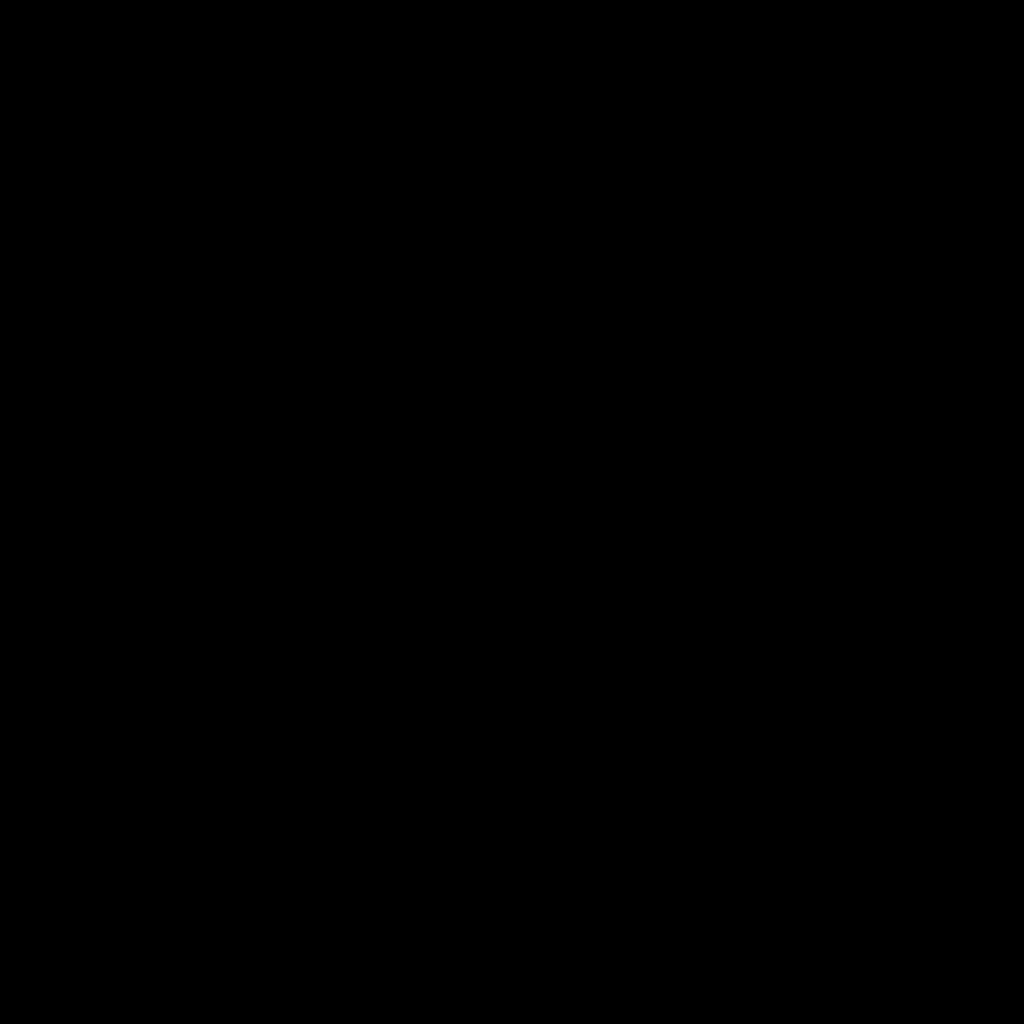

Modelo: stabilityai/stable-diffusion-xl-base-1.0
Tiempo de generación: 129.73 segundos
Imagen guardada como: imagen_generada_stabilityai_stable-diffusion-xl-base-1.0.png



model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.53k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

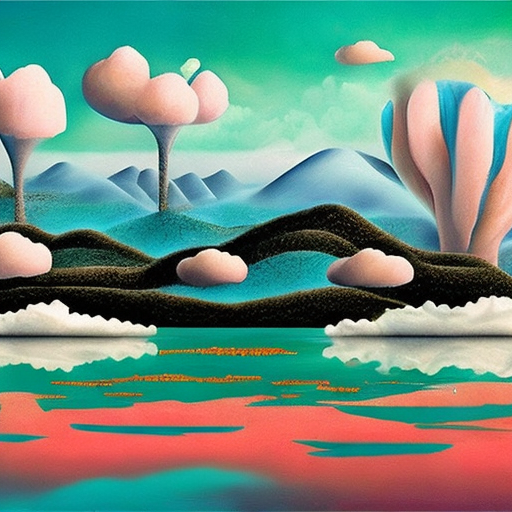

Modelo: prompthero/openjourney-v4
Tiempo de generación: 110.79 segundos
Imagen guardada como: imagen_generada_prompthero_openjourney-v4.png



model_index.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/318 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type xlm-roberta to instantiate a model of type M-CLIP. This is not supported for all configurations of models and can yield errors.


Error al generar con el modelo kandinsky-community/kandinsky-2-1: KandinskyPipeline.__call__() missing 2 required positional arguments: 'image_embeds' and 'negative_image_embeds'



In [2]:
import time
import torch
from diffusers import DiffusionPipeline
from PIL import Image
from IPython.display import display

# Lista de modelos a probar
modelos = [
    "CompVis/stable-diffusion-v1-4",               # Stable Diffusion v1.4
    "runwayml/stable-diffusion-v1-5",             # Stable Diffusion v1.5
    "stabilityai/stable-diffusion-xl-base-1.0",   # Stable Diffusion XL
    "prompthero/openjourney-v4",                  # OpenJourney
    "kandinsky-community/kandinsky-2-1"          # Kandinsky 2.1
]

def generar_imagenes_con_diferentes_modelos(descripcion_textual):
    for modelo_id in modelos:
        try:
            inicio = time.time()

            pipeline = DiffusionPipeline.from_pretrained(modelo_id, torch_dtype=torch.float16)
            pipeline = pipeline.to("cuda")

            with torch.autocast("cuda"):
                resultado = pipeline(descripcion_textual)
                imagen = resultado.images[0]

            # Tiempo de procesamiento
            fin = time.time()
            tiempo_total = fin - inicio

            display(imagen)

            nombre_archivo = f"imagen_generada_{modelo_id.replace('/', '_')}.png"
            imagen.save(nombre_archivo)

            print(f"Modelo: {modelo_id}")
            print(f"Tiempo de generación: {tiempo_total:.2f} segundos")
            print(f"Imagen guardada como: {nombre_archivo}\n")

        except Exception as e:
            print(f"Error al generar con el modelo {modelo_id}: {e}\n")

# Prompt para generar las imágenes
descripcion = "Un paisaje surrealista con montañas flotantes y un cielo púrpura"
generar_imagenes_con_diferentes_modelos(descripcion)
